# 📌 환경 설정

- ⚠️ 주의할 부분 두 가지

  - 1) 데이터 로드 : 최초에 chroma_db로 데이터를 로드할 때는 데이터 로드 부분의 주석을 해제하고 실행 (이후 chroma_db에 저장되면 데이터 로드 코드를 주석처리하고 실행)

  - 2) LLM : 무료 버전의 Gemini(일일 토큰 제한 O)와 유료 버전의 GPT가 있으므로 선택적으로 사용

- 📜 `.env` 파일 포함 내용 : LLM API Key (Gemini(무료), GPT(유료)), Ngrok Auth Key

In [18]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("drive/MyDrive/prometheus_project_kongkongbot")  # 경로를 지정해주세요

!pip install -r requirements.txt
!pip install pyngrok langchain_community langchain_chroma langchain_huggingface langchain_google_genai langchain_openai

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Using cached aiohttp-3.12.13-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.6 kB)
  Using cached asttokens-2.4.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached certifi-2025.6.15-py3-none-any.whl.metadata (2.4 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached contourpy-1.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached debugpy-1.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached decorator-5.1.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached executing-2.0.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached fastapi-0.116.0-py3-none-any.whl.metadata (28 kB)
  Using cached

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-16' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:69> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 67, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    s

---

# 📌 데이터셋 목록

In [19]:
DATASETS = (
    # AIHub 헬스케어 질의응답 데이터
    ("뇌신경정신질환_1", "DIR_TXT"),
    ("뇌신경정신질환_2", "DIR_TXT"),
    ("뇌신경정신질환_3", "DIR_TXT"),
    ("뇌신경정신질환_4", "DIR_TXT"),
    ("뇌신경정신질환_5", "DIR_TXT"),
    ("뇌신경정신질환_6", "DIR_TXT"),
    ("소화기질환_1", "DIR_TXT"),
    ("소화기질환_2", "DIR_TXT"),
    ("소화기질환_3", "DIR_TXT"),
    ("순환기질환_1", "DIR_TXT"),
    ("순환기질환_2", "DIR_TXT"),
    ("신장비뇨기질환_1", "DIR_TXT"),
    ("신장비뇨기질환_2", "DIR_TXT"),
    ("유방내분비질환_1", "DIR_TXT"),
    ("응급질환_1", "DIR_TXT"),
    ("응급질환_2", "DIR_TXT"),
    ("응급질환_3", "DIR_TXT"),
    ("응급질환_4", "DIR_TXT"),
    ("종양혈액질환_1", "DIR_TXT"),
    ("종양혈액질환_2", "DIR_TXT"),
    ("종양혈액질환_3", "DIR_TXT"),
    ("종양혈액질환_4", "DIR_TXT"),
    ("종양혈액질환_5", "DIR_TXT"),
    ("종양혈액질환_6", "DIR_TXT"),
    ("호흡기질환_1", "DIR_TXT"),
    ("호흡기질환_2", "DIR_TXT"),
    ("호흡기질환_3", "DIR_TXT"),
    # 심전도 관련 PDF
    ("심전도.pdf", "PDF"),
    # 질병관리청 감염병 뉴스(Web)
    (["http://kdcanewsletter.or.kr/25071801",
        "http://kdcanewsletter.or.kr/25062001",
        "http://kdcanewsletter.or.kr/25052301",
        "http://kdcanewsletter.or.kr/25041801",
        "http://kdcanewsletter.or.kr/25032101",
        "http://kdcanewsletter.or.kr/25022601",
        "http://kdcanewsletter.or.kr/25022101",
        "http://kdcanewsletter.or.kr/25012401",
        "http://kdcanewsletter.or.kr/24112201",
        "http://kdcanewsletter.or.kr/24101803",
        "http://kdcanewsletter.or.kr/24101802",
        "http://kdcanewsletter.or.kr/24101801",
        "http://kdcanewsletter.or.kr/24092001",
        "http://kdcanewsletter.or.kr/24082303",
        "http://kdcanewsletter.or.kr/24082302",
        "http://kdcanewsletter.or.kr/24082301",
        "http://kdcanewsletter.or.kr/240816",
        "http://kdcanewsletter.or.kr/240719"], "HTTP_URLS", "section3 cvfocus"),
    # 감염병 포털 주간 소식지
    (["https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250327171244735&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250320173927585&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250313163955222&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250306163242403&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250227165248235&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250220163913814&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250213172422817&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250206165608274&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250204145239744&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250124103144403&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250117075624016&q_clsfNo=2",
        "https://dportal.kdca.go.kr/pot/bbs/BD_selectBbs.do?q_bbsSn=1010&q_bbsDocNo=20250110125956821&q_clsfNo=2"], "HTTP_URLS", "article-content"),
)

# 📌 프롬프트

In [20]:
PROMPT = {
  "role": "당신은 의료용 AI Agent(Assistant) '콩콩봇'으로, 의료/건강에 대해 정확하고 신뢰성 있는 정보를 제공합니다.",
  "task": """사용자의 응답을 기반으로, 사용자(환자)의 상태를 더 잘 파악하기 위한 후속 질문을 던지거나, 관련된 정보를 제공하며 질문에 답을 해주세요.
            또한 충분한 대화가 이루어지고 정보가 확보되면 진단을 내리세요. (단, 대화 기록을 확인했을 때 대화가 3개 미만이면 진단을 절대로 내리지 말 것)""",
  "tool": """당신이 사용할 수 있는 Tool은 2가지입니다. 첫째, 심전도(ECG)와 체온 측정. 둘째, 최종 진단 결과 표시와 함께 병원 추천.
            각각의 Tool은 답변의 맨 마지막에 <진단/>, <병원/>이라는 태그를 붙여 자동으로 작동시킬 수 있습니다.""",
  "tool-constraint-1": """심전도(ECG)와 체온 측정 Tool : ecg(심전도)는 -1, temp(체온)은 0이 존재하지 않는 값(미측정)에 해당합니다.
            전달받은 ecg(심전도), temp(체온) 데이터가 존재하지 않는 값이고, 더 정밀한 진단이 필요한 시점에 1회만 측정 Tool을 작동시키세요.
            이미 ecg(심전도), temp(체온) 데이터가 있다면 실행하지 않습니다.""",
  "tool-constraint-2": """병원 추천 Tool : 진단을 내릴 정도로 사용자(환자)의 정보가 충분히 확보되면, 최종 진단 결과를 내립니다.
            최종 진단은 최소 3회 이상의 대화 후에, 그리고 대화 종료 전에 이루어져야 하며, 진단 결과에 대한 양식을 준수해서 답해주세요.
            이때 진단 결과 병원에 가야 할 정도로 상태가 심각하다고 판단되면 병원 추천 Tool을 작동시키세요.
            상태가 심각하지 않다면 Tool을 호출하지 않고 진단 내용으로 대화를 종료합니다.""",
  "tool-flow": """일반적인 Tool 사용의 흐름은 다음과 같습니다 : 사용자와의 대화를 통해 기초 상태 파악 -> ecg(심전도), temp(체온)가 존재하지 않는 값이면 <진단/> Tool 실행
            -> 심전도와 체온 정보를 기반으로 심층 상태 파악 -> 최종적으로 진단 결과를 제시하며, 상태가 심각하면 <병원/> Tool 실행, 마무리 인사 및 대화 종료""",
  "policy-answer": """주어진 문맥(context)과 채팅 기록(previous chat history)을 기반으로, 사실에 근거하여 정확하게 답해주세요.
            문맥(context)에 관련 질환의 원인, 상태, 치료 관련 정보가 주어지면, 사용자(환자)에게 도움이 될 만한 정보만 선별하여 응답을 만들 때 참고하세요.""",
  "policy-uncertainty": "만약 답변에 확신이 없다면, 그렇다는 것을 확실하게 말하고 그 대신 정보를 찾을 수 있는 신뢰할 만한 출처를 남겨주세요.",
  "policy-question-range": """응답은 의료용 AI Agent(Assistant)로서 건강 정보의 제공, 혹은 사용자(환자)의 의학적 상태를 파악하기 위한 질문으로 범위가 제한되어야 합니다.
            만약 사용자가 전혀 관련 없는 질문을 하면, 의료용 AI Agent로서 건강과 관련된 질문에만 답변이 가능하다고 친절하게 알려주세요.""",
  "policy-reference": "사용자(환자)와의 채팅 기록을 계속해서 참고하여, 사용자(환자)의 상태를 분석하고 관련된 대화를 이어나가는 데에 이용하세요.",
  "policy-value-1": """심전도 측정 결과(ecg)는 다음의 5가지 값 중 하나를 가집니다. (혹은 존재하지 않는 값 -1) :
            정상(0), 심방성 부정맥(1), 심실성 부정맥(2), 융합 박동(3), 알 수 없음(4). 이때 심전도 결과를 답변에 포함시킬 때는 숫자를 포함하지 말고 명칭으로 불러주세요.""",
  "policy-value-2": "체온은 실수 형태로 주어지며, 0은 존재하지 않는 값(미측정)입니다.",
  "policy-value-3": "심전도와 체온 값은 최종 진단을 내릴 때만 명시적으로 제시되면 됩니다. 환자의 상태를 파악하고 반응이나 해결책을 제시하는 중간 단계에서는 참고용으로만 사용하고 명시적으로 제시하지 말아주세요.",
  "policy-start": "이전 대화 기록이 없다면, 대화를 시작할 때 친절하고 가벼운 인사와 함께 시작해주세요.",
  "policy-progress1": """대화가 충분히 진행되지 않았거나(질문이 3개 미만인 경우), 사용자의 증상이 아직 명확하지 않은 경우에는
            최근 증상, 식습관, 생활 습관 변화, 기저 질환, 가족력, 스트레스 수준, 수면 습관, 운동 여부, 음주 및 흡연 여부 등에 대해 추가 질문을 하여 사용자의 상태를 더 잘 이해하도록 하세요.
            심전도와 체온 측정, 그리고 최종 진단이 대화 초반부터 이루어져서는 안 됩니다.""",
  "policy-progress2": """대화가 충분히 진행되었고(질문 3개 이상), 사용자의 증상이 파악된 경우, 진단 결과를 표시하고 필요 시 병원 추천 Tool을 사용합니다.
            증상이 심각하여 즉시 병원 방문이 필요할 때만 진단 내용 뒤에 <병원/> 태그를 포함하여 병원 추천 Tool이 작동되도록 만들어 주세요.""",
  "policy-end": "사용자가 대화를 종료하고 싶다는 의사를 밝히거나 끝 인사를 하는 경우, 진단 내용을 마지막에 전달한 후 작별 인사를 전하세요.",
  "knowledge1": "질문이 정의, 원인, 증상, 치료, 진단, 약물, 예방, 식이/생활습관 중 어느 항목에 해당하는지를 판단하고, 그에 적합한 내용을 제공하세요. (질문이 어떤 유형인지 분류할 필요는 없습니다.)",
  "knowledge2": "최근 유행 중인 감염병에 대한 질문일 경우, 최신 정보를 참고하여 답변하세요.",
  "audience": "복잡한 의학 용어 대신, 일상적인 쉬운 언어를 사용하여 정보를 제공하세요. 또한 길게 말하기보다 간결하게 말하세요.",
  "general-format": "응답은 격식체 한국어로 작성하며, 350자 이내로 간결하게 유지하십시오.",
  "diagnosis": """진단 결과 표시 Tool을 작동시킨다는 것은, 응답과 함께 아래 형식을 따르는 진단 결과(정보)를 제시하고 맨 뒤에 <병원/> 태그를 붙이는 것입니다. :
            1. 심전도(ECG) 측정 결과 (제공된 값에 대응되는 명칭으로 작성)
            2. 체온 측정 결과 (제공된 값을 기준으로 작성)
            3. 증상 (대표 증상 또는 질환명을 2~3줄로 요약)
            4. 권고 사항 (사용자(환자)의 상태를 고려하여 해결을 위한 제안, 확실하지 않을 경우 전문가 상담 권유)
  """,
  "format-1": """심전도와 체온 측정 Tool의 예시는 다음과 같습니다. :
            더 정확한 진단을 위해, 심전도와 체온을 측정해볼게요. <진단/>
  """,
  "format-2": """진단 결과 표시 및 병원 추천 Tool의 예시는 다음과 같습니다. (증상이 심각한 경우 예시) :
            지금까지의 대화 내용을 바탕으로 진단한 결과는 다음과 같습니다.
            - 심전도 측정 결과: 심실성 부정맥
            - 체온 측정 결과: 37.4°C
            - 증상: 심전도 상에서 심실성 부정맥이 확인되었으며, 체온도 약간 상승된 상태입니다. 최근 운동 시 두근거림, 숨 가쁨, 어지러움 등의 증상이 동반되고 있어, 단순 피로나 스트레스보다는 심장 기능 이상 가능성을 배제할 수 없습니다.
            - 권고 사항: 심실성 부정맥은 경우에 따라 심각한 심장 문제로 이어질 수 있는 신호일 수 있으므로, 빠른 시일 내에 심장 전문의(순환기내과) 진료를 받아보시길 강력히 권장드립니다. 특히 최근의 수면 부족과 운동 부족도 심장 부담 요인이 될 수 있어 생활습관 개선도 함께 필요합니다.
            병원 방문이 필요해 보이므로, 근처의 병원을 추천해드리겠습니다. <병원/>
  """,
  "question-example": """질문의 예시는 다음과 같습니다. :
    - 최근에 숨이 가빠지거나 어지러움, 흉통, 실신 같은 증상도 있으셨나요?
    - 최근에 과도한 스트레스 상황이 있었거나 카페인을 많이 섭취하셨나요? 수면이나 운동 습관을 알려주시면 도움이 될 것 같아요!
    - 심전도 결과는 정상 범위로 보이지만, 이상 증상이 있을 수도 있으니 더 자세히 확인하고자 합니다. 최근 심장 관련 질환을 심하게 앓았던 적이 있으신가요?
  """
}

In [21]:
import re
import os
import bs4
# from prompt import PROMPT
# from datasets import DATASETS
from concurrent.futures import ThreadPoolExecutor
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader, PyMuPDFLoader, TextLoader, DirectoryLoader, JSONLoader
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.memory import ConversationBufferMemory
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain
from fastapi import FastAPI
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
import nest_asyncio
from pyngrok import ngrok, conf
import uvicorn

from dotenv import load_dotenv
load_dotenv()
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

API_KEY = os.environ.get("API_KEY")
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
ngrok.set_auth_token(os.environ.get("NGROK_AUTH_TOKEN"))
DATASET_FILEPATH = "./datasets"
DATABASE_FILEPATH = "./chroma_db"
CHUNK_SIZE = 2500
CHUNK_OVERLAP = 10

# def json_loader_with_schema(file_path):
#     return JSONLoader(file_path=file_path, jq_schema=".answer[]")

# ======================== Load Document ========================
def load_documents(files):
    """다양한 형식의 파일을 읽어 옴"""
    loader = None
    file_path = files[0]
    file_type = files[1]
    if file_type == "HTTP_URLS":
        loader = WebBaseLoader(
            web_paths=file_path,
            bs_kwargs=dict(
                parse_only=bs4.SoupStrainer("section", attrs={"class": [files[2]]})
            ),
        )
    elif file_type == "PDF":
        loader = PyMuPDFLoader(DATASET_FILEPATH + "/" + file_path)
    elif file_type == "TEXT":
        loader = TextLoader(DATASET_FILEPATH + "/" + file_path, encoding="utf-8")
    elif file_type == "DIR_TXT":
        loader = DirectoryLoader(DATASET_FILEPATH + "/" + file_path, glob="**/*.txt", loader_cls=TextLoader, loader_kwargs={"encoding": "utf-8"})
    # elif file_type == "DIR_JSON":
    #     loader = DirectoryLoader(DATASET_FILEPATH + "/" + file_path, glob="**/*.json", loader_cls=json_loader_with_schema)
    else:
        print("Invalid File Type:", file_path)
    return loader.load()

def preprocessing(document):
    """문서 전처리"""
    document.page_content = re.sub(r"\n", " ", document.page_content)
    document.page_content = re.sub(r"\s{2,}", " ", document.page_content)
    return document

def make_document(files, chunk_size, chunk_overlap):
    """파일을 데이터베이스에 저장하기 위해 CHUNK로 분할"""
    with ThreadPoolExecutor() as executor:
        results = executor.map(load_documents, files)

    docs = [preprocessing(doc) for result in results for doc in result]
    print("문서 수 :", len(docs))

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    split_documents = text_splitter.split_documents(docs)
    return split_documents


# ======================== Build Database ========================
def make_database(split_documents):
    """데이터베이스 구축"""
    embeddings = HuggingFaceEmbeddings(model_name='jhgan/ko-sbert-nli')
    # embeddings = HuggingFaceEmbeddings(model_name='intfloat/multilingual-e5-small')

    if os.path.exists(DATABASE_FILEPATH):
        vector_store = Chroma(persist_directory=DATABASE_FILEPATH, embedding_function=embeddings)
        if split_documents:
            vector_store.add_documents(split_documents)
    else:
        vector_store = Chroma.from_documents(documents=split_documents, embedding=embeddings, persist_directory=DATABASE_FILEPATH)
    return vector_store.as_retriever()


# ======================== Build Language Model ========================
def make_prompt():
    """프롬프트 생성"""
    return PromptTemplate.from_template(
      " ".join(PROMPT.values()) + """
        Generate an answer based on the provided context, as well as the patient's ECG and body temperature data (if exist):
        # Previous conversation: {chat_history}
        # Context: {context}
        # Question: {question}
      """
    )

def make_model():
    """LLM 모델 생성"""
    return ChatOpenAI(
        model="gpt-4-1106-preview",
        temperature=0.7,
        max_tokens=1024,
        openai_api_key=OPENAI_API_KEY
    )
    # return ChatGoogleGenerativeAI(
    #     model="gemini-2.5-flash",
    #     api_key=API_KEY
    # )


user_memories = {}
def make_memory(user_id):
    """채팅 기록을 위한 메모리"""
    if user_id not in user_memories:
        user_memories[user_id] = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
    return user_memories[user_id]

def make_chain(model, retriever, memory, prompt):
    return ConversationalRetrievalChain.from_llm(
        llm=model,
        retriever=retriever,
        memory=memory,
        combine_docs_chain_kwargs={"prompt": prompt},
    )

def run_ai(question, ecg, temp, chain):
    return chain.invoke({"question": f"{question}\n(환자의 심전도 수치: {ecg}, 체온: {temp}도)"})["answer"]


# ======================== FastAPI ========================
app = FastAPI()
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

class LLMRequest(BaseModel):
    question: str
    ecg: int
    temp: float
    user_id: int
    chat_id: int


# ======================== 최초 실행 시 데이터 로드 코드 ========================
# documents = make_document(files=DATASETS, chunk_size=CHUNK_SIZE, chunk_overlap=CHUNK_OVERLAP)
# for DATASET in DATASETS:
#     print(DATASET)
#     documents = make_document(files=(DATASET,), chunk_size=CHUNK_SIZE, chunk_overlap=CHUNK_OVERLAP)
#     retriever = make_database(documents)
#     print("└> 완료")


# ======================== 이후 실행 시 데이터 로드 불필요 ========================
documents = None
retriever = make_database(documents)

prompt = make_prompt()
model = make_model()

@app.post("/ai_rag")
async def chat(request: LLMRequest):
    '''
    Request : question | ecg | temp | user_id | chat_id
    Response : content | is_diag | is_recommend
    '''
    try:
        memory = make_memory(str(request.user_id) + "/" + str(request.chat_id))
        chain = make_chain(model, retriever, memory, prompt)
        answer = run_ai(request.question, request.ecg, request.temp, chain)

        is_diag = False
        is_recommend = False
        if "<진단/>" in answer:
            answer = answer.replace("<진단/>", "")
            is_diag = True
        elif "<병원/>" in answer:
            answer = answer.replace("<병원/>", "")
            is_recommend = True

        return JSONResponse(content={"content": answer, "is_diag": is_diag, "is_recommend": is_recommend},
                            media_type="application/json; charset=utf-8")

    except Exception as e:
        return {"error": str(e)}

if __name__ == "__main__":
    ngrok_tunnel = ngrok.connect(8000)
    print('공용 URL:', ngrok_tunnel.public_url)
    nest_asyncio.apply()
    uvicorn.run(app, port=8000)  # uvicorn.run("agent:app", host="0.0.0.0", port=8000, reload=True)

공용 URL: https://4834c6186e41.ngrok-free.app


INFO:     Started server process [513]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     182.209.103.156:0 - "POST /ai_rag HTTP/1.1" 200 OK
INFO:     182.209.103.156:0 - "POST /ai_rag HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Finished server process [513]


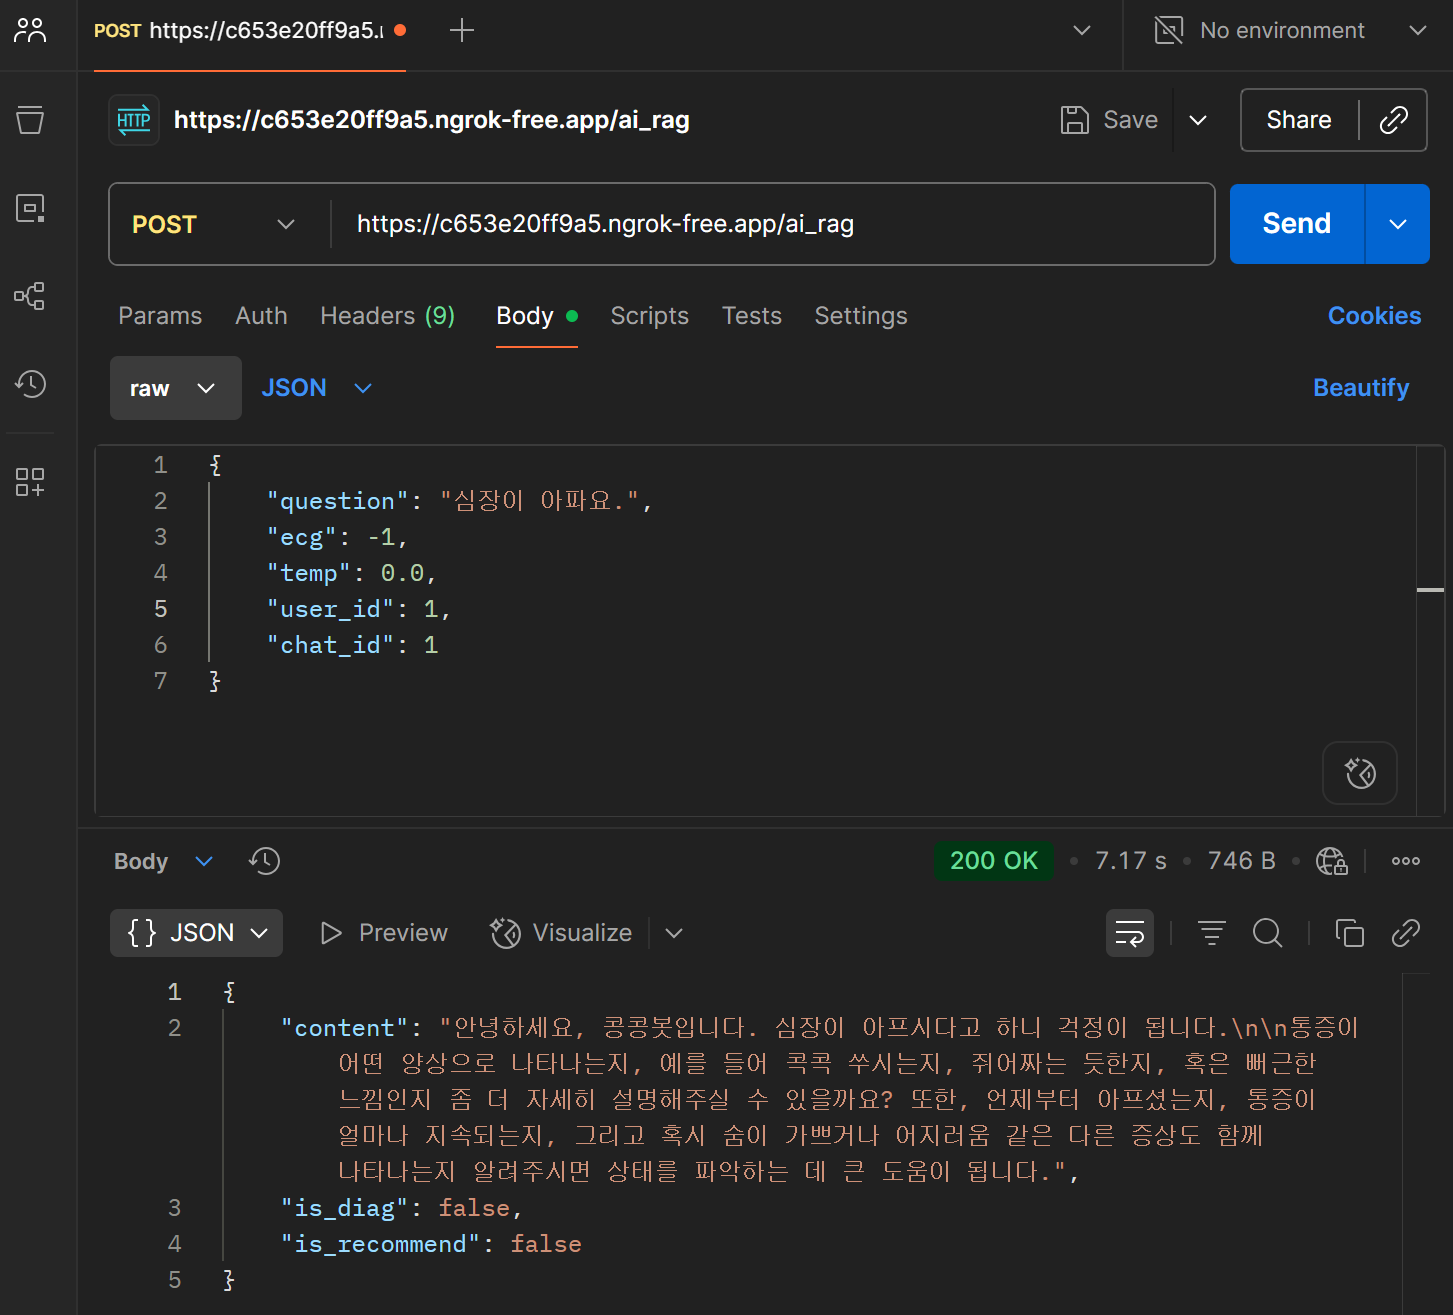

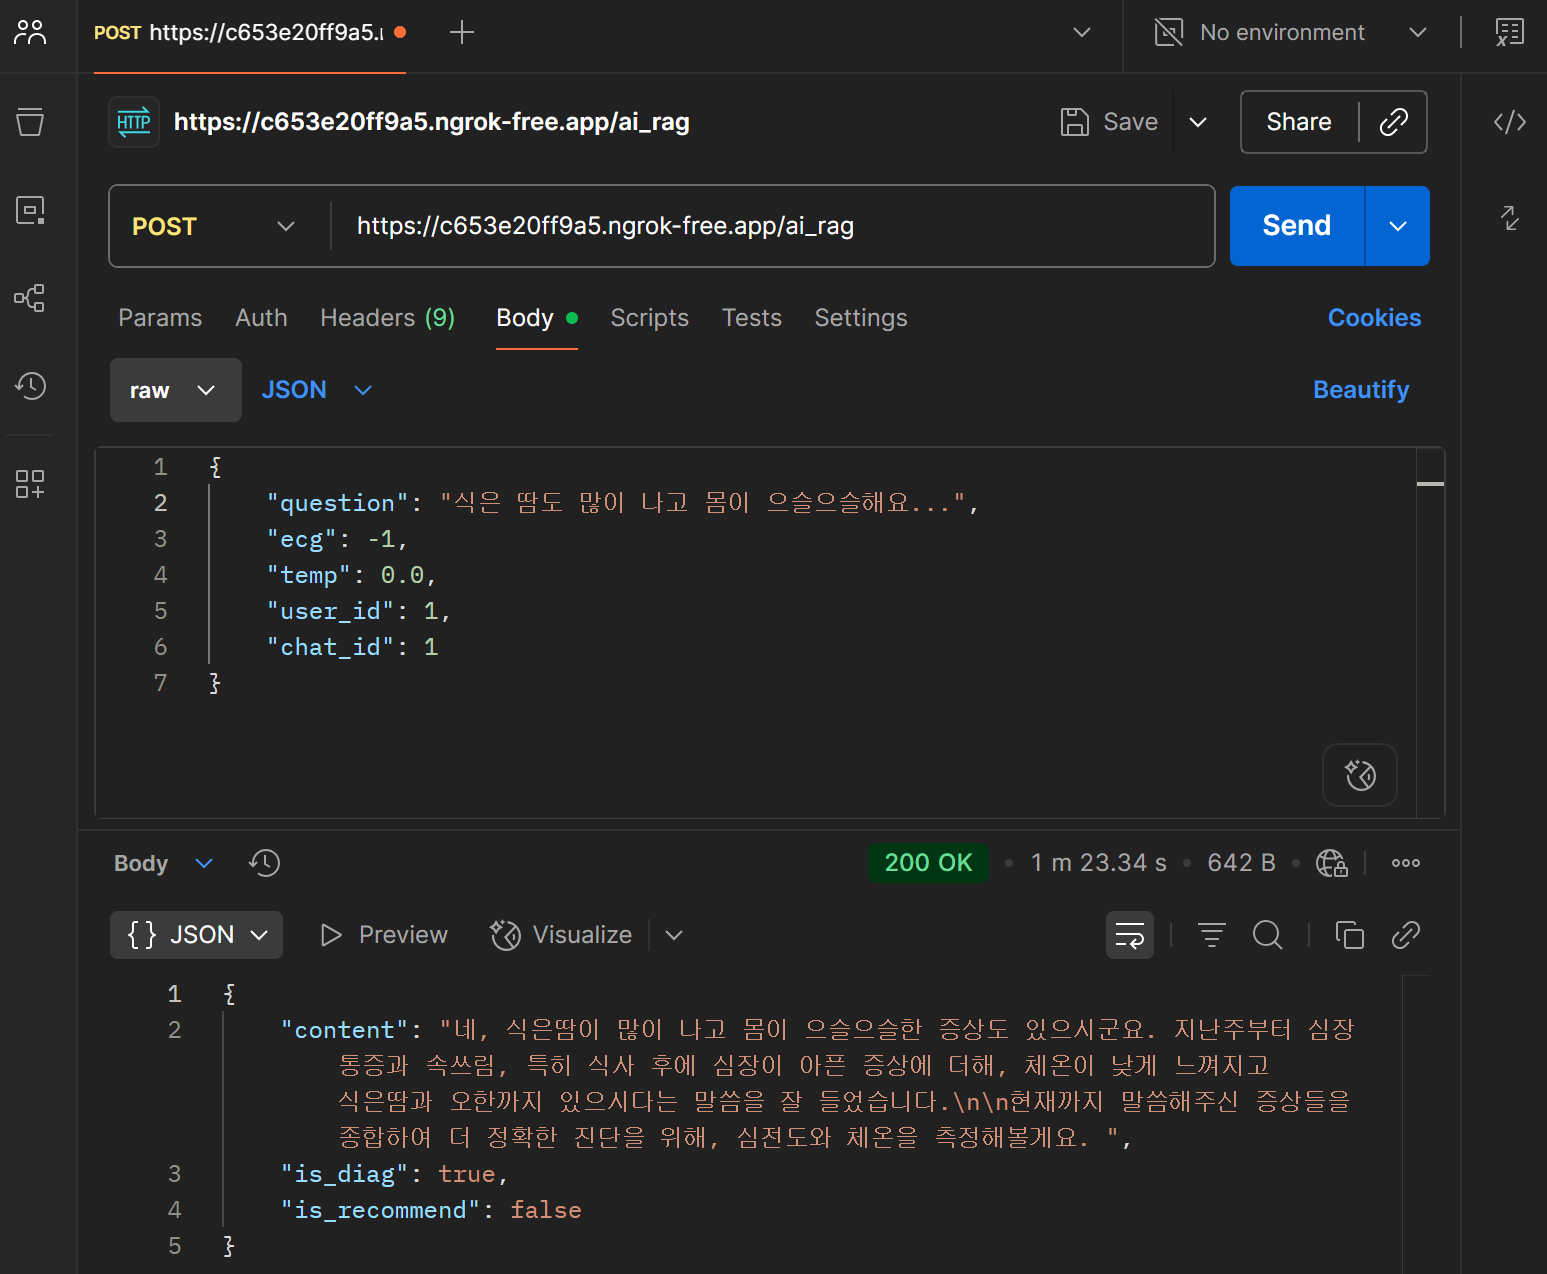